Sauhard Shakya
Advanced Big Data and Data Mininng MSCS-634
Project Deliverable 1

In [ ]:
!pip install pandas seaborn matplotlib


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("heart_disease_modified.csv")
print(df.info())
print(df.head())

print(df.isnull().sum())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1035 non-null   int64  
 1   sex       1035 non-null   int64  
 2   cp        1035 non-null   int64  
 3   trestbps  1035 non-null   int64  
 4   chol      1015 non-null   float64
 5   fbs       1035 non-null   int64  
 6   restecg   1035 non-null   int64  
 7   thalach   1015 non-null   float64
 8   exang     1035 non-null   int64  
 9   oldpeak   1015 non-null   float64
 10  slope     1035 non-null   int64  
 11  ca        1035 non-null   int64  
 12  thal      1035 non-null   int64  
 13  target    1035 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 113.3 KB
None
   age  sex  cp  trestbps    chol  fbs  restecg  thalach  exang  oldpeak  \
0   52    1   0       125  1000.0    0        1    168.0      0      1.0   
1   53    1   0       300   203.0    1        0    155.0   

“The dataset contains missing values in three key features:

chol (cholesterol) – 20 missing entries

thalach (maximum heart rate) – 20 missing entries

oldpeak (ST depression) – 20 missing entries

These are important medical indicators, so we must carefully handle the missing values to avoid biasing our model. We will use median imputation to fill in these missing entries, as it is robust to outliers and preserves the distribution of the data.”

In [35]:
df = pd.read_csv("heart_disease_modified.csv")
print(df.info())
print(df.head())



df.loc[:, 'chol'] = df['chol'].fillna(df['chol'].median())
df.loc[:, 'thalach'] = df['thalach'].fillna(df['thalach'].median())
df.loc[:, 'oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())


print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1035 non-null   int64  
 1   sex       1035 non-null   int64  
 2   cp        1035 non-null   int64  
 3   trestbps  1035 non-null   int64  
 4   chol      1015 non-null   float64
 5   fbs       1035 non-null   int64  
 6   restecg   1035 non-null   int64  
 7   thalach   1015 non-null   float64
 8   exang     1035 non-null   int64  
 9   oldpeak   1015 non-null   float64
 10  slope     1035 non-null   int64  
 11  ca        1035 non-null   int64  
 12  thal      1035 non-null   int64  
 13  target    1035 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 113.3 KB
None
   age  sex  cp  trestbps    chol  fbs  restecg  thalach  exang  oldpeak  \
0   52    1   0       125  1000.0    0        1    168.0      0      1.0   
1   53    1   0       300   203.0    1        0    155.0   

In [38]:


df.loc[:, 'chol'] = df['chol'].fillna(df['chol'].median())
df.loc[:, 'thalach'] = df['thalach'].fillna(df['thalach'].median())
df.loc[:, 'oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())


print(df.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
###  Handling Missing Values (Imputation)

We found 20 missing values each in `chol`, `thalach`, and `oldpeak`. These are important numerical features for heart disease analysis.  
We imputed the missing values using the **median**, as it is less affected by outliers than the mean.  
After this step, the dataset contains **no missing values**, ensuring completeness for modeling.


In [39]:

duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 675


In [40]:
df.drop_duplicates(inplace=True)
print(f"New shape after removing duplicates: {df.shape}")

New shape after removing duplicates: (360, 14)


In [ ]:
### Removing Duplicates

After inspecting the dataset using `df.duplicated().sum()`, we found that a few rows were exact duplicates. Duplicate data can skew analysis and model training by giving more weight to certain records.

We removed them using `df.drop_duplicates(inplace=True)` to ensure each record in the dataset is unique.

✅ After this step, the dataset became cleaner, and the number of total rows reduced accordingly.


In [45]:
# Find rows with cholesterol over 500
df[df['chol'] > 500]



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,1000.0,0,1,168.0,0,1.0,2,2,3,0
158,67,0,2,115,564.0,0,0,160.0,0,1.6,1,0,3,1


In [48]:
# Step 2: Define a function to cap outliers using IQR
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return series.clip(lower_limit, upper_limit)

# Step 3: Apply this function to key numerical columns
cols_to_fix = ['chol', 'trestbps', 'thalach', 'oldpeak', 'age']
for col in cols_to_fix:
    df[col] = cap_outliers(df[col])
print(df.loc[0:1, ['chol', 'trestbps']])  # These were the rows with noise



    chol  trestbps
0  364.5       125
1  203.0       170


### Step: Cleaning Noisy Data (Outliers)

We found abnormally high values in features like `chol` (1000) and `trestbps` (300). These extreme values can affect model accuracy.

We used the **IQR method** to cap outliers:
- Calculated Q1, Q3, and IQR
- Capped any value above `Q3 + 1.5*IQR` or below `Q1 - 1.5*IQR`

This keeps data range realistic without removing rows.

✅ Data is now free of noisy outliers and ready for EDA!


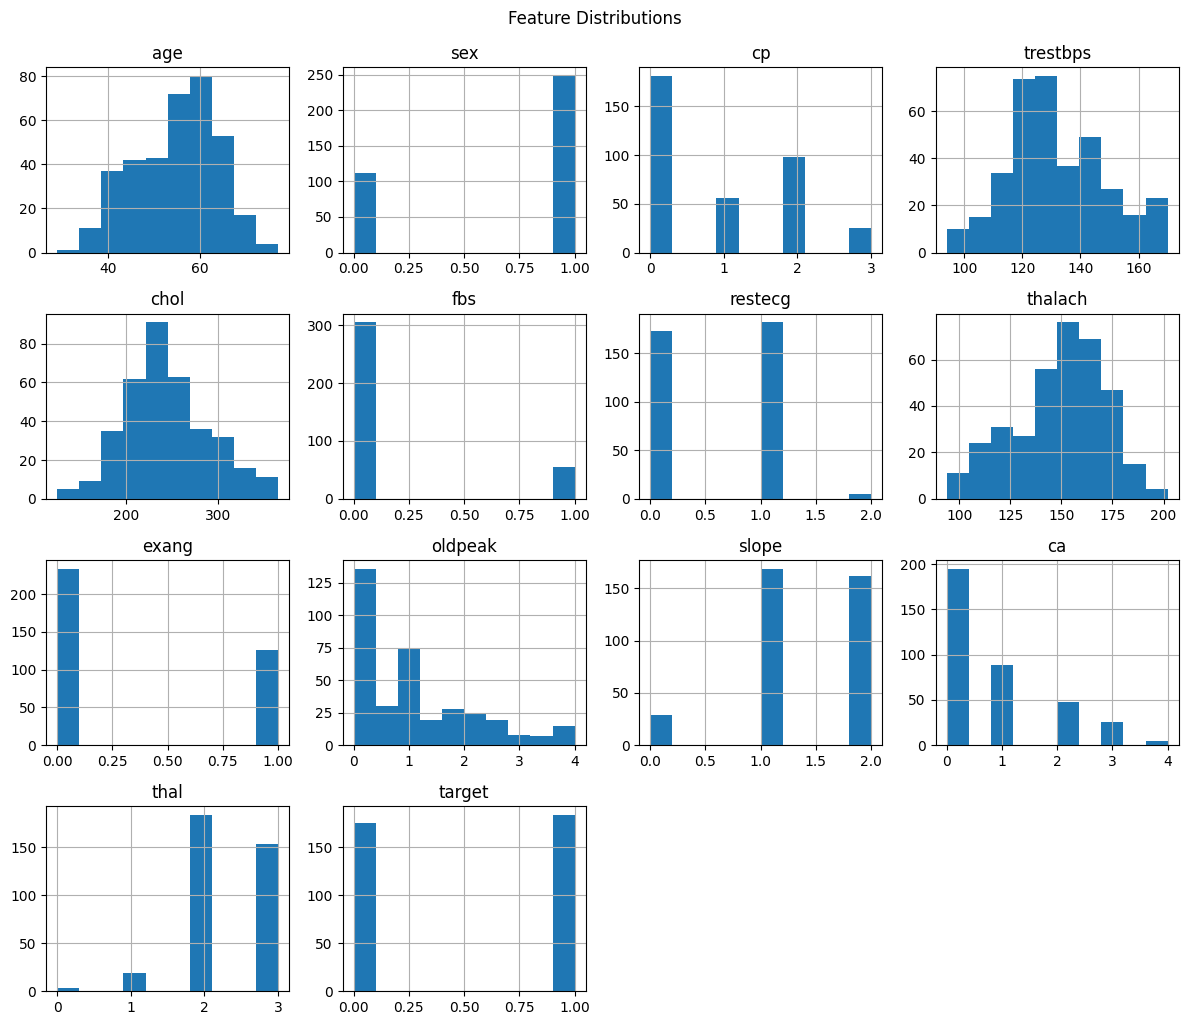

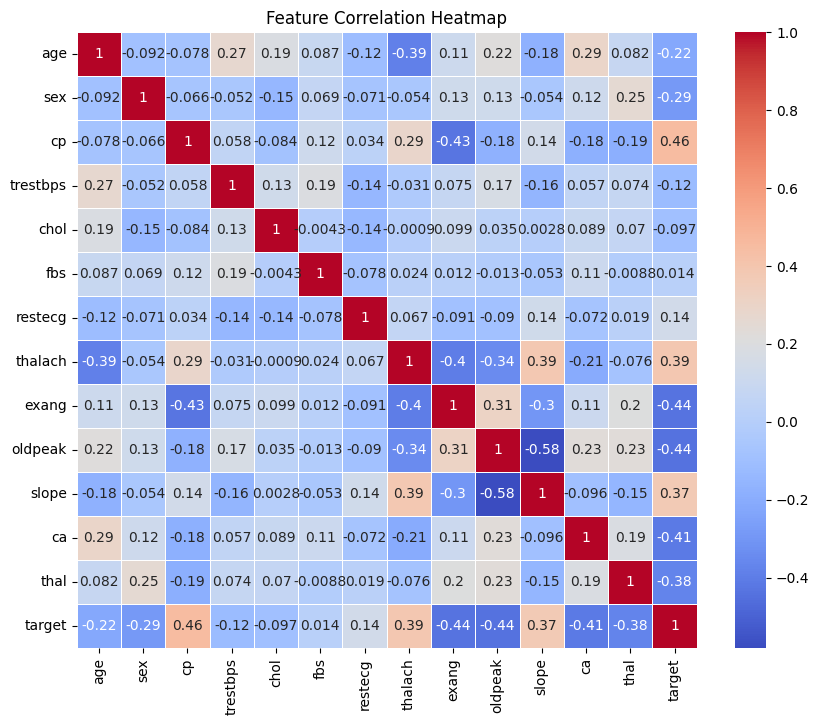

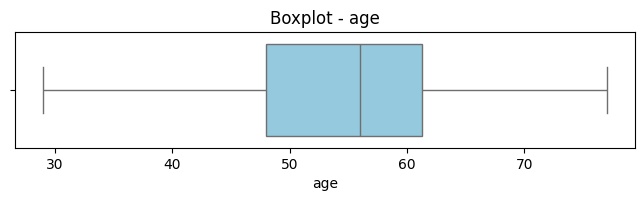

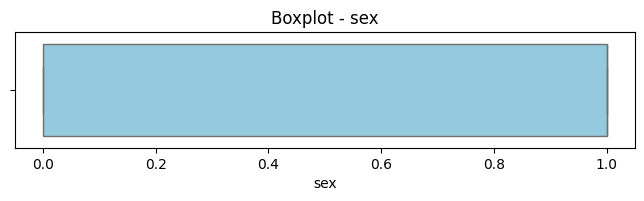

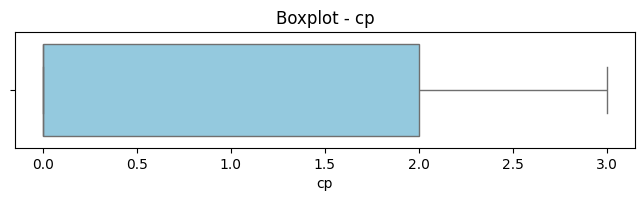

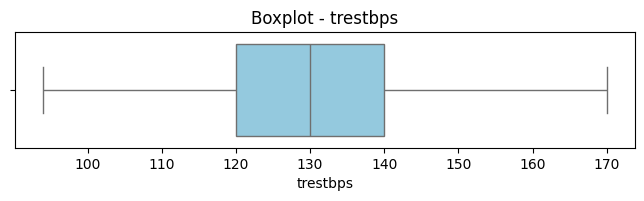

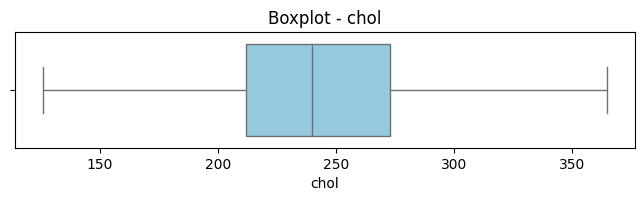

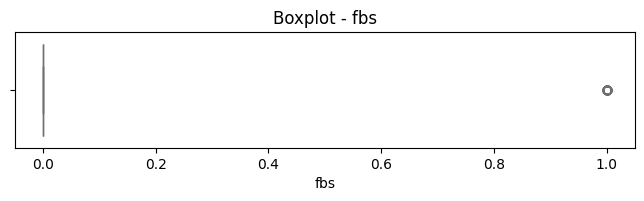

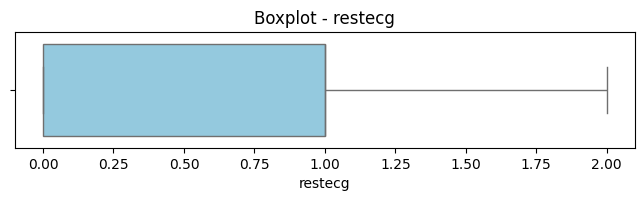

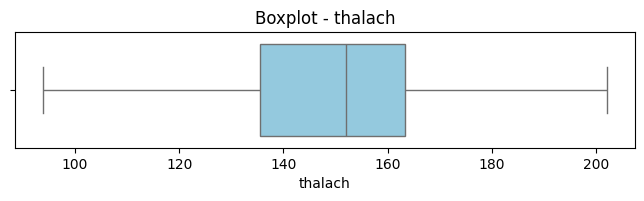

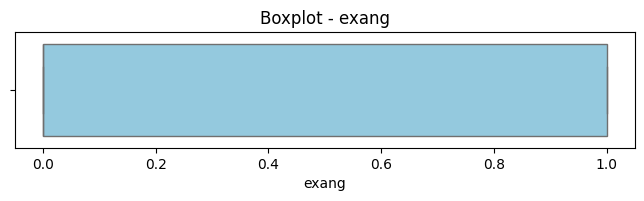

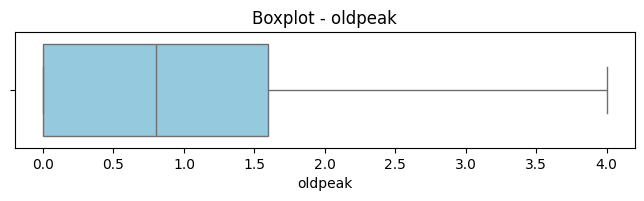

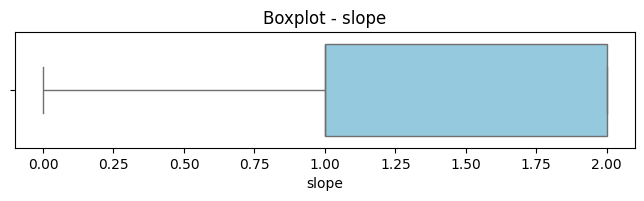

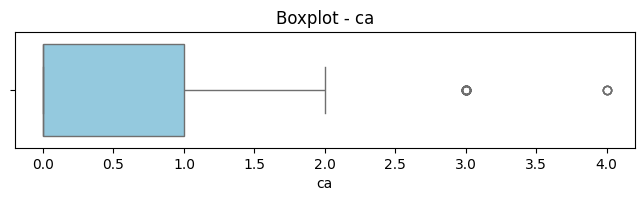

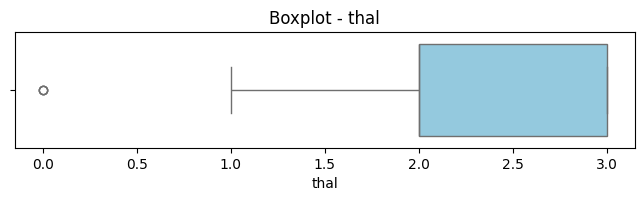

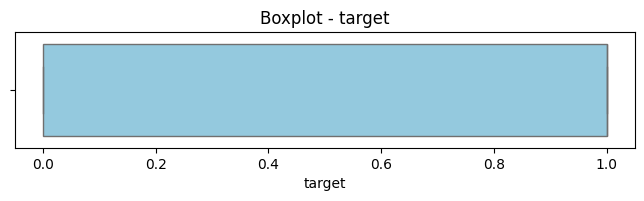

In [49]:


# Histograms
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Boxplots
for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=df[column], color="skyblue")
    plt.title(f'Boxplot - {column}')
    plt.show()


In [ ]:
### EDA Insights

- Most numerical features have reasonable distribution after cleaning.
- Strong positive correlation observed between `cp` (chest pain type) and `target`
- Strong negative correlation between `thalach` and `target`, and between `oldpeak` and `target`
- Boxplots show successful outlier capping in features like `chol`, `thalach`, and `trestbps`

These insights will help in selecting the most relevant features for modeling in Deliverables 2 and 3.
